# Curvas de ROC

Toy example:

In [1]:
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

Vamos utilizar dados gerados (saídas e probabilidadeS)

In [2]:
y = np.array([1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2])
scores = np.array([0.1, 0.1, 0.2, 0.3, 0.4, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
fpr, tpr, thresholds = roc_curve(y, scores, pos_label=2)
roc_auc = roc_auc_score(y, scores)
print("AUC: {}".format(roc_auc))

AUC: 0.7857142857142858


Agora vamos plotar a curva de ROC

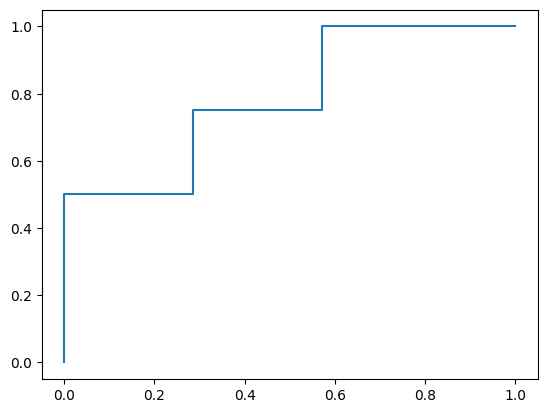

In [3]:
plt.figure()
plt.plot(fpr, tpr)

## Um Exemplo com dados reais

Seção contendo os imports necessários

In [4]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

Vamos gerar um problema de classificação com 5 características e 2 classes

In [5]:
# generate 2 class dataset
X, Y = make_classification(n_samples=1000, n_features=5, n_classes=2,
                           random_state=1)

Inspecionando o dataset gerado:

In [6]:
X[:5]

array([[-1.39087601,  0.62478042,  3.4809096 ,  2.3823372 ,  0.38622388],
       [-0.48529475,  0.30051483,  1.33915253,  0.84620081,  1.17745439],
       [-0.73504687,  0.13412273,  1.54350554,  1.22343943, -0.62879943],
       [ 0.6594484 ,  1.47747999,  1.0281535 , -0.80770875, -0.34350003],
       [ 0.17288184,  0.99271923,  1.18375139, -0.10191134,  0.08911753]])

In [7]:
Y[:10]

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0])

Agora vamos separar os dados em **treino** e **teste**:

In [8]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.5,
                                                random_state=2)

e treinar o nosso Regressor Logístico utilizando a classe `LogisticRegression` do scikit-learn

In [9]:
# fit a model
model = LogisticRegression()
model.fit(trainX, trainY)

LogisticRegression()

Agora vamos avaliar a qualidade do nosso modelo utilizando a partição de **teste**

In [10]:
pred_prob = model.predict_proba(testX)

Vamos manter somente o resultado positivo -> o exemplo pertence a classe `1`

In [11]:
pred_prob = pred_prob[:,1]

Agora calculamos o score AUC:

In [12]:
auc = roc_auc_score(testY, pred_prob)
print("AUC score: {:.3f}".format(auc))

AUC score: 0.934


Vamos calcular os parâmetros necessários para plotar a curva de ROC:

In [13]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(testY,
                                                                pred_prob)

Agora vamos plotar a curva:

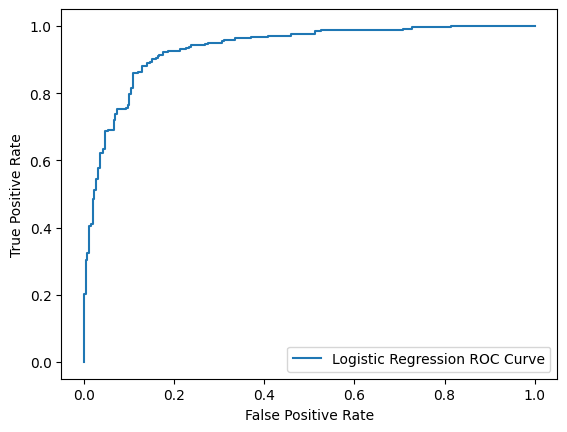

In [14]:
pyplot.plot(false_positive_rate, true_positive_rate,
            label='Logistic Regression ROC Curve')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Exercício

O conjunto de dados está disponível publicamente no Kaggle e é proveniente de um estudo cardiovascular em curso sobre residentes da cidade de Framingham, Massachusetts. O objetivo da classificação é prever se o doente tem um risco de 10 anos de futura doença coronária (CHD). O conjunto de dados fornece as informações dos doentes. Inclui mais de 4.000 registos e 15 atributos.

Cada atributo é um potencial factor de risco. Existem factores de risco demográficos, comportamentais e médicos.

### Download and read the data:

In [15]:
!pip install gdown

In [16]:
!gdown https://drive.google.com/uc?id=1yHNFuQkro58eBbcfy27aM4IwcGUwHtpO

Downloading...
From: https://drive.google.com/uc?id=1yHNFuQkro58eBbcfy27aM4IwcGUwHtpO
To: /content/framingham.csv
100% 196k/196k [00:00<00:00, 54.4MB/s]


In [17]:
!head -10 framingham.csv

male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,39,4,0,0,0,0,0,0,195,106,70,26.97,80,77,0
0,46,2,0,0,0,0,0,0,250,121,81,28.73,95,76,0
1,48,1,1,20,0,0,0,0,245,127.5,80,25.34,75,70,0
0,61,3,1,30,0,0,1,0,225,150,95,28.58,65,103,1
0,46,3,1,23,0,0,0,0,285,130,84,23.1,85,85,0
0,43,2,0,0,0,0,1,0,228,180,110,30.3,77,99,0
0,63,1,0,0,0,0,0,0,205,138,71,33.11,60,85,1
0,45,2,1,20,0,0,0,0,313,100,71,21.68,79,78,0
1,52,1,0,0,0,0,1,0,260,141.5,89,26.36,76,79,0


Read the data using Pandas

In [18]:
import pandas as pd

In [19]:
heart_df=pd.read_csv("framingham.csv")

In [20]:
heart_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Tarefas

1.Explore os dados e crie um classificador de Regressão Logística para prever a variável `TenYearCHD`.
1. Experimente uma combinação de variáveis para construir o melhor classificador.
1. Construir curvas ROC e calcular a AUC para comparar os classificadores.
1. Comparar com os classificadores `SVM` e `KNN`

### Explorando os dados

Shape of the dataframe: (4238, 16)

First 5 rows of the dataframe:
   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       8

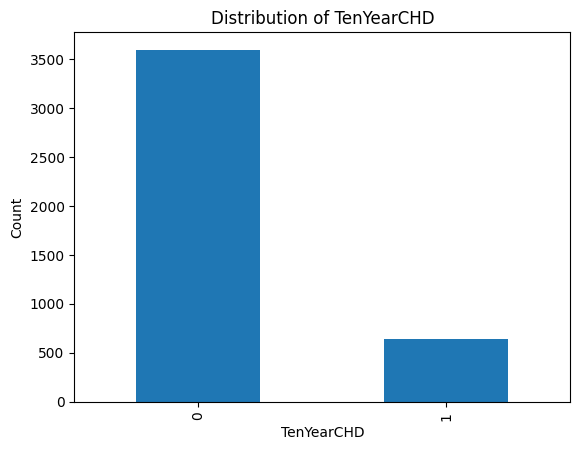

In [23]:
import matplotlib.pyplot as plt
# Verifique o formato do dataframe
print("Shape of the dataframe:", heart_df.shape)

# Exiba as primeiras linhas
print("\nFirst 5 rows of the dataframe:")
print(heart_df.head())

# Exiba informações sobre as colunas e tipos de dados
print("\nInformation about the dataframe:")
print(heart_df.info())

# Exiba estatísticas de resumo para colunas numéricas
print("\nSummary statistics for numerical columns:")
print(heart_df.describe())

# Verifique valores ausentes
print("\nMissing values per column:")
print(heart_df.isnull().sum())

# Obtenha os valores únicos e suas contagens para a variável alvo
print("\nValue counts for 'TenYearCHD':")
print(heart_df['TenYearCHD'].value_counts())

# Visualize a distribuição da variável alvo
heart_df['TenYearCHD'].value_counts().plot(kind='bar')
plt.title('Distribution of TenYearCHD')
plt.xlabel('TenYearCHD')
plt.ylabel('Count')
plt.show()

# Você pode explorar as distribuições de outros recursos também, por exemplo, usando histogramas
# heart_df['age'].hist()
# plt.title('Distribution of Age')
# plt.xlabel('Age')
# plt.ylabel('Frequency')
# plt.show()

### 1 - Combinação de variáveis para construir o melhor classificador

AUC with All Features: 0.729
AUC with Subset 1 Features (age, cigsPerDay, sysBP, diaBP, glucose): 0.719
AUC with Subset 2 Features (age, totChol, BMI, heartRate): 0.685


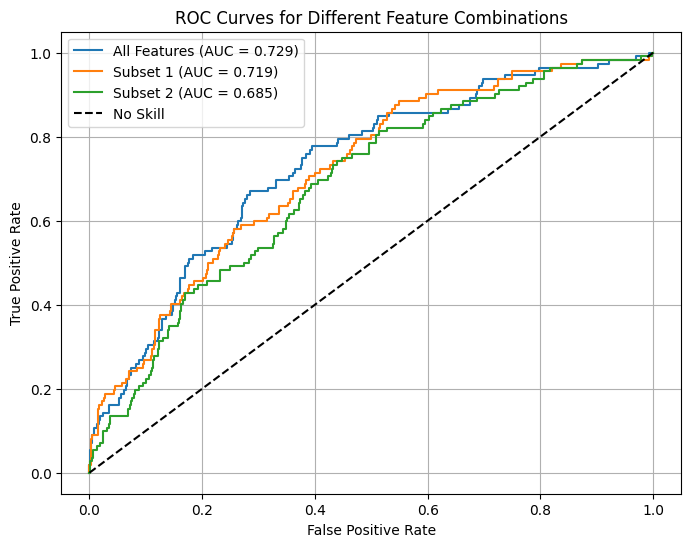

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd

heart_df_cleaned = heart_df.dropna()
target = 'TenYearCHD'
feature_columns = [col for col in heart_df_cleaned.columns if col != target]

def evaluate_model(X, y, feature_names):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    model = LogisticRegression(solver='liblinear', random_state=42)
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_prob)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    return auc, fpr, tpr, feature_names

X_all = heart_df_cleaned[feature_columns]
y_all = heart_df_cleaned[target]
auc_all, fpr_all, tpr_all, features_all = evaluate_model(X_all, y_all, "All Features")

print(f"AUC with All Features: {auc_all:.3f}")
selected_features_1 = ['age', 'cigsPerDay', 'sysBP', 'diaBP', 'glucose']
X_subset_1 = heart_df_cleaned[selected_features_1]
y_subset_1 = heart_df_cleaned[target]
auc_subset_1, fpr_subset_1, tpr_subset_1, features_subset_1 = evaluate_model(X_subset_1, y_subset_1, "Subset 1")

print(f"AUC with Subset 1 Features ({', '.join(selected_features_1)}): {auc_subset_1:.3f}")
selected_features_2 = ['age', 'totChol', 'BMI', 'heartRate']
X_subset_2 = heart_df_cleaned[selected_features_2]
y_subset_2 = heart_df_cleaned[target]
auc_subset_2, fpr_subset_2, tpr_subset_2, features_subset_2 = evaluate_model(X_subset_2, y_subset_2, "Subset 2")

print(f"AUC with Subset 2 Features ({', '.join(selected_features_2)}): {auc_subset_2:.3f}")
plt.figure(figsize=(8, 6))
plt.plot(fpr_all, tpr_all, label=f'{features_all} (AUC = {auc_all:.3f})')
plt.plot(fpr_subset_1, tpr_subset_1, label=f'{features_subset_1} (AUC = {auc_subset_1:.3f})')
plt.plot(fpr_subset_2, tpr_subset_2, label=f'{features_subset_2} (AUC = {auc_subset_2:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Feature Combinations')
plt.legend()
plt.grid(True)
plt.show()

### Construindo curvas ROC e calcular a AUC para comparar os classificadores.

Logistic Regression AUC: 0.729
SVM AUC: 0.672
KNN AUC: 0.672


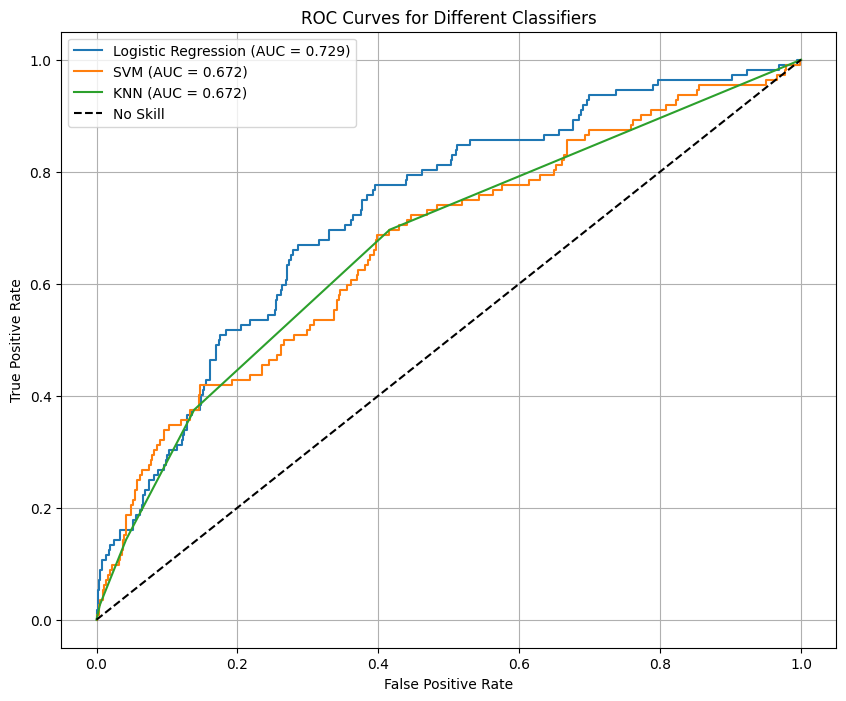

In [25]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

X_cleaned = heart_df_cleaned[feature_columns]
y_cleaned = heart_df_cleaned[target]

X_train_comp, X_test_comp, y_train_comp, y_test_comp = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42, stratify=y_cleaned)

lr_model = LogisticRegression(solver='liblinear', random_state=42)
lr_model.fit(X_train_comp, y_train_comp)
y_prob_lr = lr_model.predict_proba(X_test_comp)[:, 1]
auc_lr = roc_auc_score(y_test_comp, y_prob_lr)
fpr_lr, tpr_lr, _ = roc_curve(y_test_comp, y_prob_lr)
print(f"Logistic Regression AUC: {auc_lr:.3f}")

svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_comp, y_train_comp)
y_prob_svm = svm_model.predict_proba(X_test_comp)[:, 1]
auc_svm = roc_auc_score(y_test_comp, y_prob_svm)
fpr_svm, tpr_svm, _ = roc_curve(y_test_comp, y_prob_svm)
print(f"SVM AUC: {auc_svm:.3f}")


knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_comp, y_train_comp)
y_prob_knn = knn_model.predict_proba(X_test_comp)[:, 1]
auc_knn = roc_auc_score(y_test_comp, y_prob_knn)
fpr_knn, tpr_knn, _ = roc_curve(y_test_comp, y_prob_knn)
print(f"KNN AUC: {auc_knn:.3f}")


plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.3f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.3f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Classifiers')
plt.legend()
plt.grid(True)
plt.show()

### 3 - Comparando com os classificadores SVM e KNN

Logistic Regression AUC: 0.729
SVM AUC: 0.672
KNN AUC: 0.672


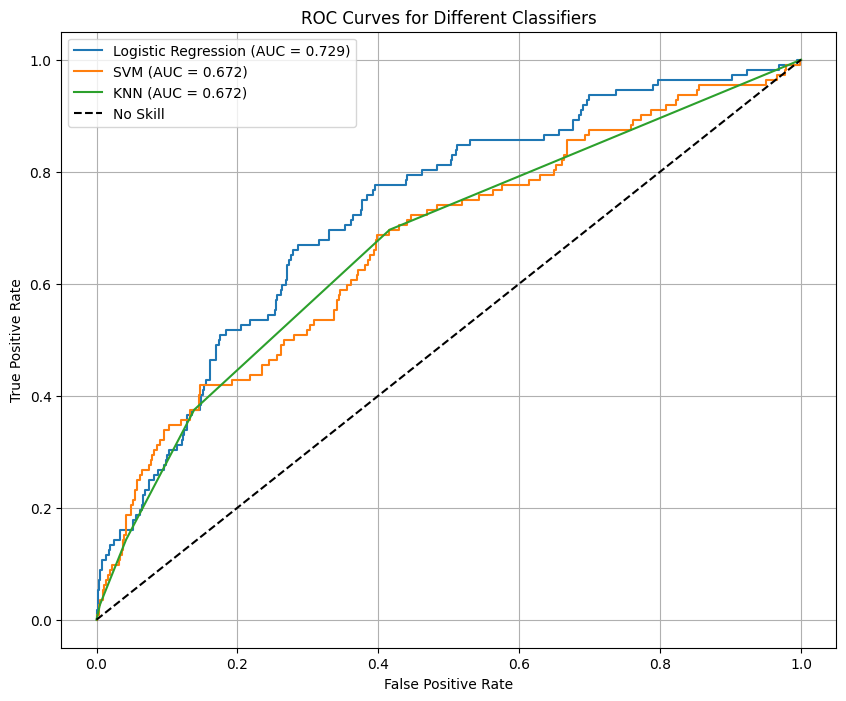

In [26]:
import matplotlib.pyplot as plt
X_cleaned = heart_df_cleaned[feature_columns]
y_cleaned = heart_df_cleaned[target]
X_train_comp, X_test_comp, y_train_comp, y_test_comp = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42, stratify=y_cleaned)
lr_model = LogisticRegression(solver='liblinear', random_state=42)
lr_model.fit(X_train_comp, y_train_comp)
y_prob_lr = lr_model.predict_proba(X_test_comp)[:, 1]
auc_lr = roc_auc_score(y_test_comp, y_prob_lr)
fpr_lr, tpr_lr, _ = roc_curve(y_test_comp, y_prob_lr)
print(f"Logistic Regression AUC: {auc_lr:.3f}")
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_comp, y_train_comp)
y_prob_svm = svm_model.predict_proba(X_test_comp)[:, 1]
auc_svm = roc_auc_score(y_test_comp, y_prob_svm)
fpr_svm, tpr_svm, _ = roc_curve(y_test_comp, y_prob_svm)
print(f"SVM AUC: {auc_svm:.3f}")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_comp, y_train_comp)
y_prob_knn = knn_model.predict_proba(X_test_comp)[:, 1]
auc_knn = roc_auc_score(y_test_comp, y_prob_knn)
fpr_knn, tpr_knn, _ = roc_curve(y_test_comp, y_prob_knn)
print(f"KNN AUC: {auc_knn:.3f}")
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.3f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.3f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Classifiers')
plt.legend()
plt.grid(True)
plt.show()
